In [2]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/82/29/923869e92c74bf07ec2b9a52ad5ac67d4184c873ba33ada7d4584356463a/shap-0.46.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for slicer==0.0.8 from https://files.pythonhosted.org/packages/63/81/9ef641ff4e12cbcca30e54e72fb0951a2ba195d0cda0ba4100e532d929db/slicer-0.0.8-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
    --------------------------------------- 10.2/456.1 kB ? eta -:--:--
    --------------------------------------- 10.2/456.1 kB ? eta -:--:--
   -- ------------------------------------ 30.7/456.1 kB 217.9 kB/s eta 0:00:02
   ----- --------------------------------- 61.4/456.1 kB 297.7 kB/s eta 0:00:02
   ---------- --------------------------- 122.9/456.1 kB 514.3 kB/s eta 0:00:01
   -------------- ----------------------- 174.1/456.1 kB 615

🔹 First 5 Rows:
    age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   Uni

D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


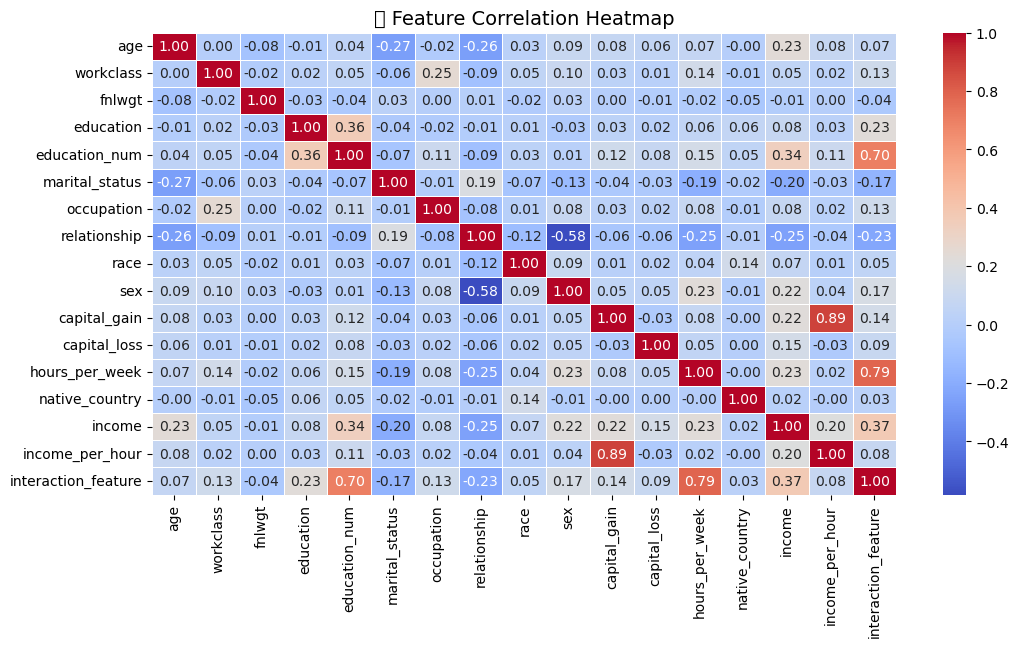

D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


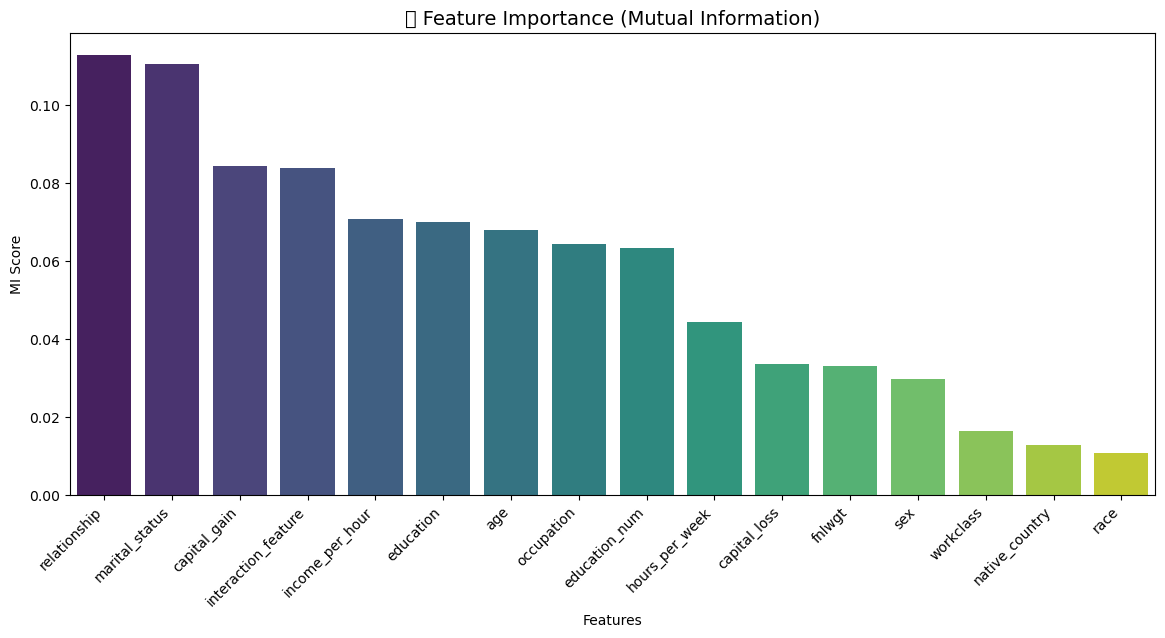


🔹 Selected Features: ['age', 'education_num', 'marital_status', 'relationship', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'income_per_hour', 'interaction_feature']

🔹 Final Processed Dataset Sample:
    age  education_num  marital_status  relationship  sex  capital_gain  \
0   39             13               4             1    1          2174   
1   50             13               2             0    1             0   
2   38              9               0             1    1             0   
3   53              7               2             0    1             0   
4   28             13               2             5    0             0   

   capital_loss  hours_per_week  income_per_hour  interaction_feature  
0             0              40         53.02439                  520  
1             0              13          0.00000                  169  
2             0              40          0.00000                  360  
3             0              40          0.00000   

D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


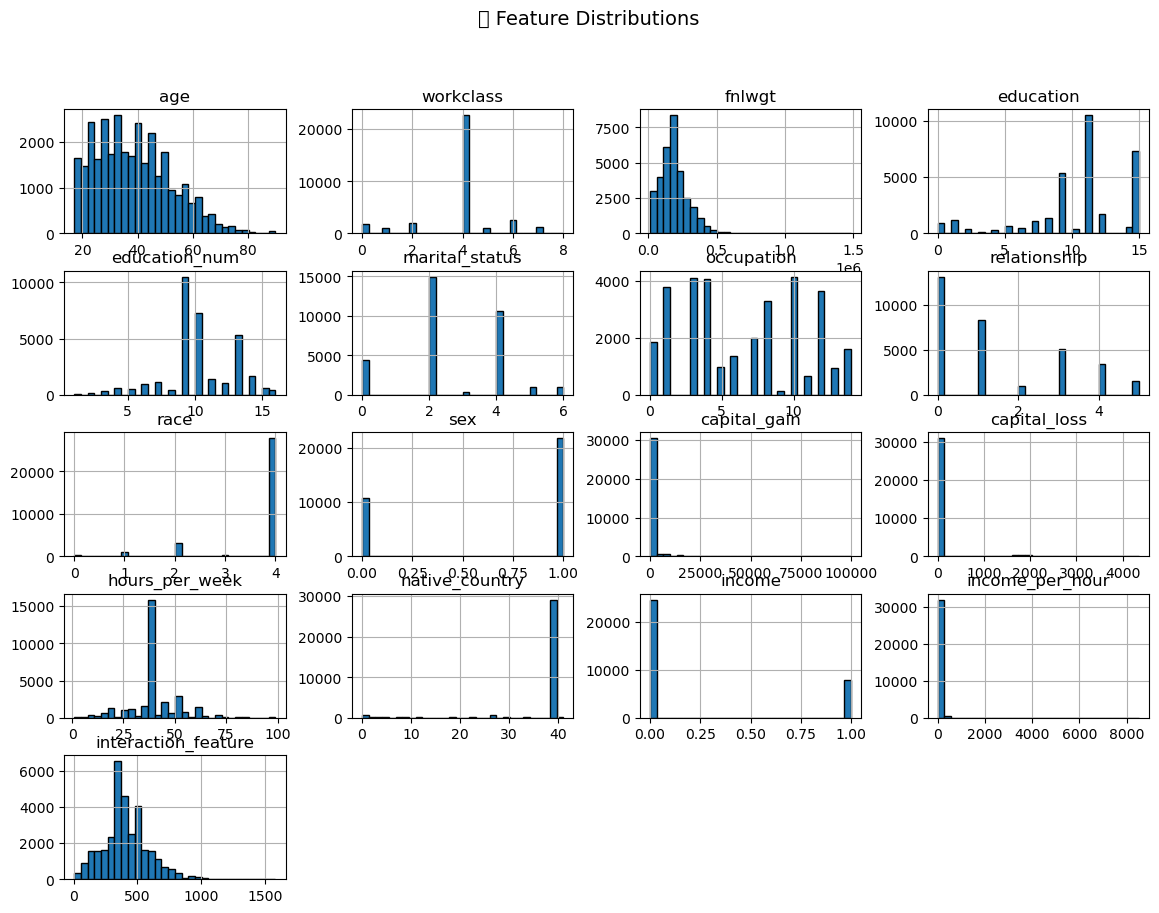

D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


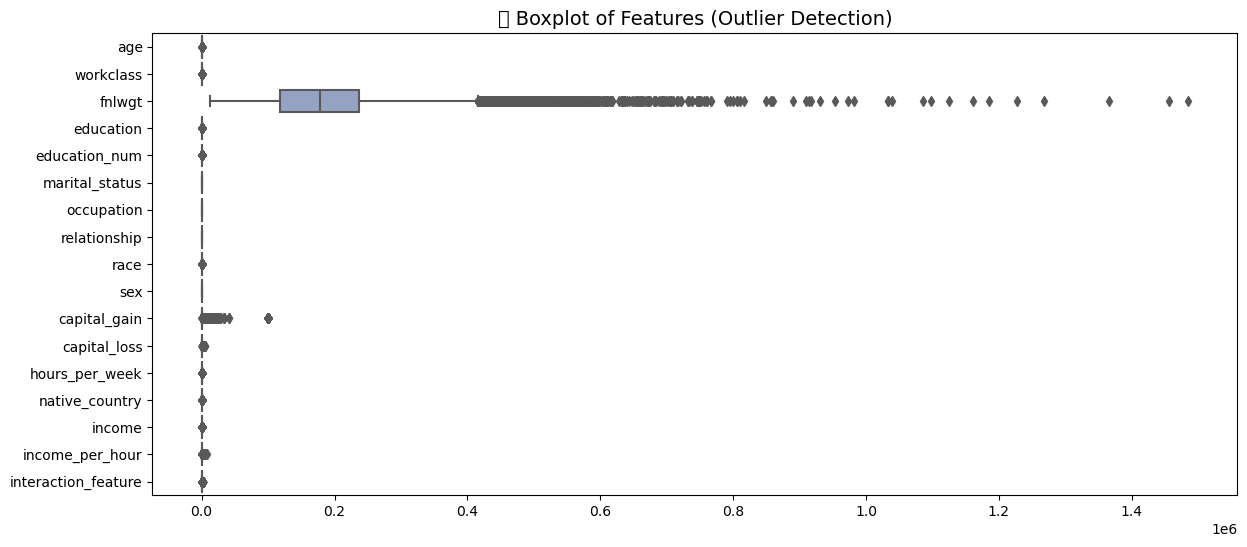

C:\Users\Owner\AppData\Local\Temp\ipykernel_31324\766505625.py:101: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  plt.tight_layout()
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


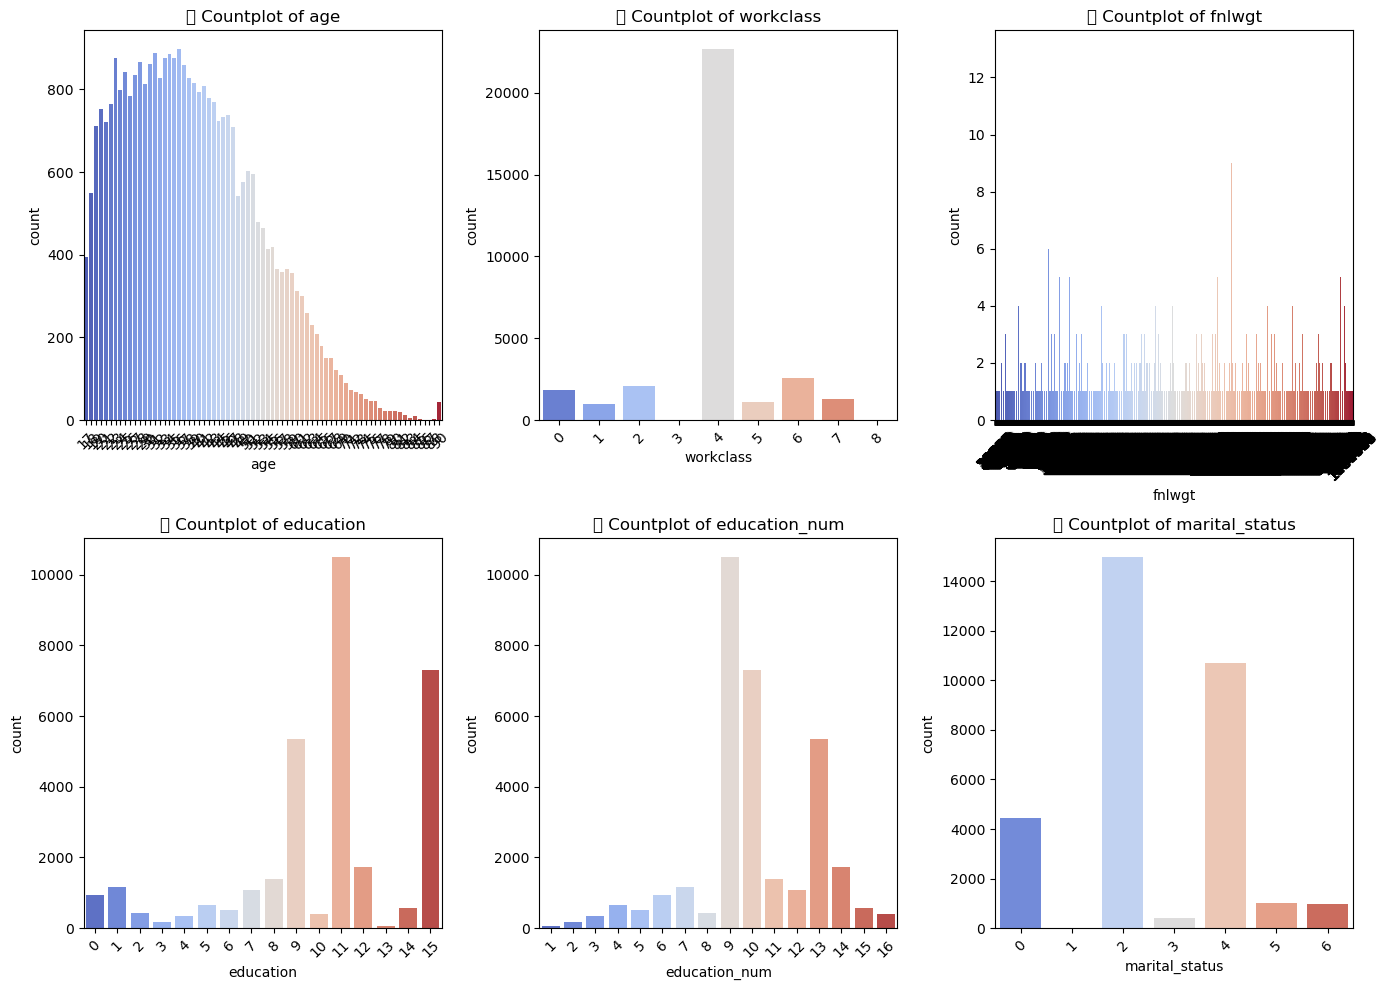

D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


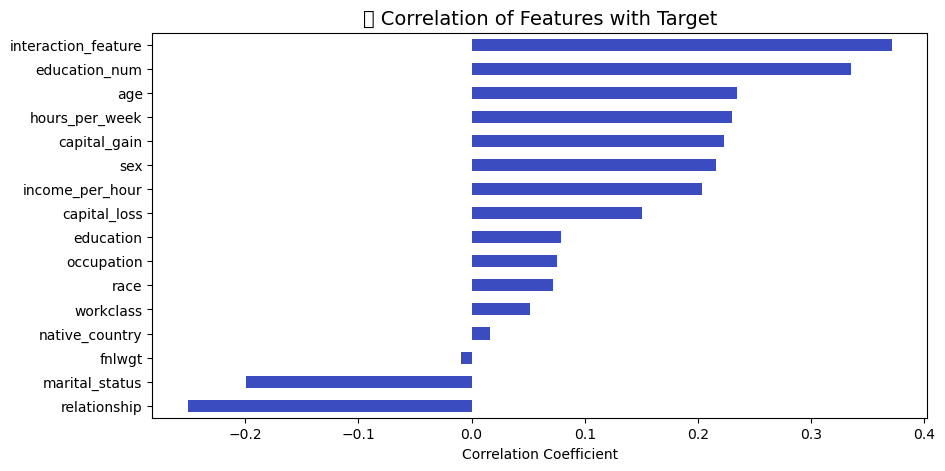

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


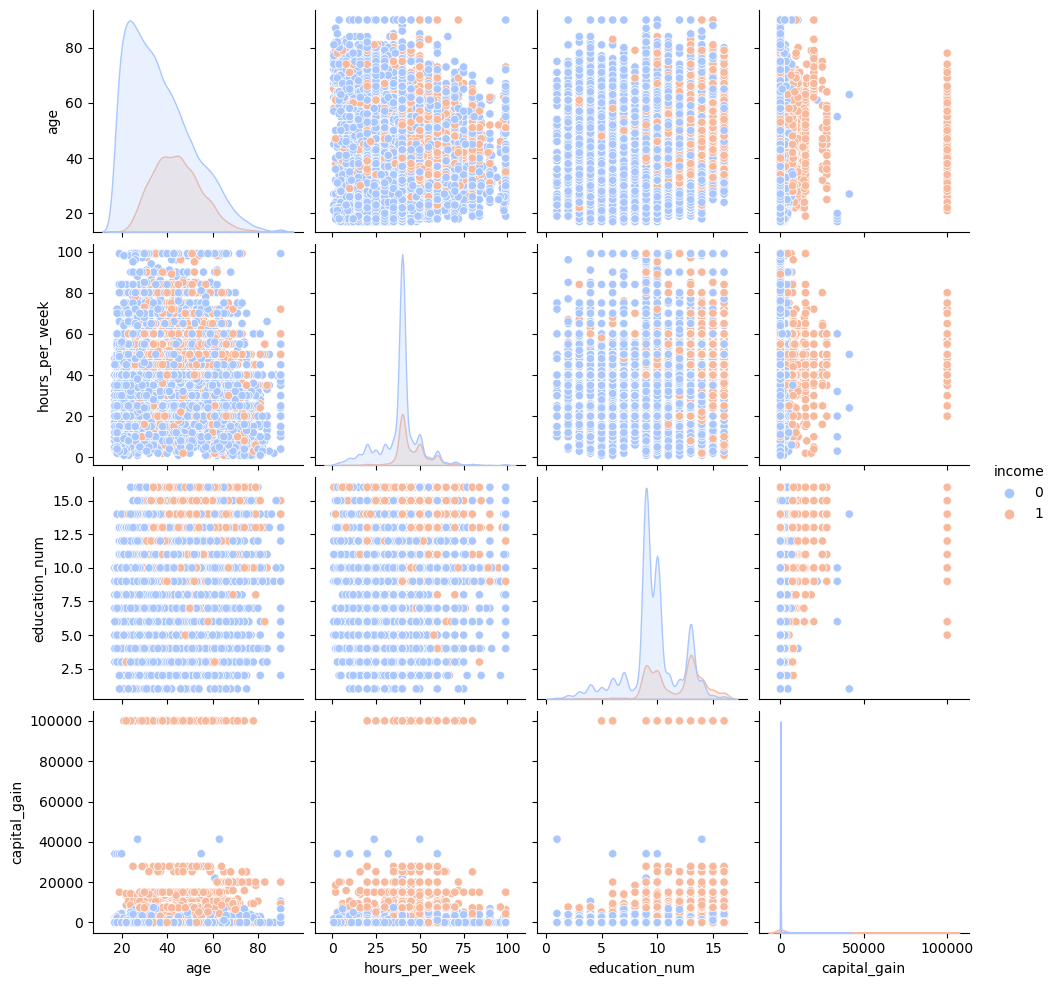

D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


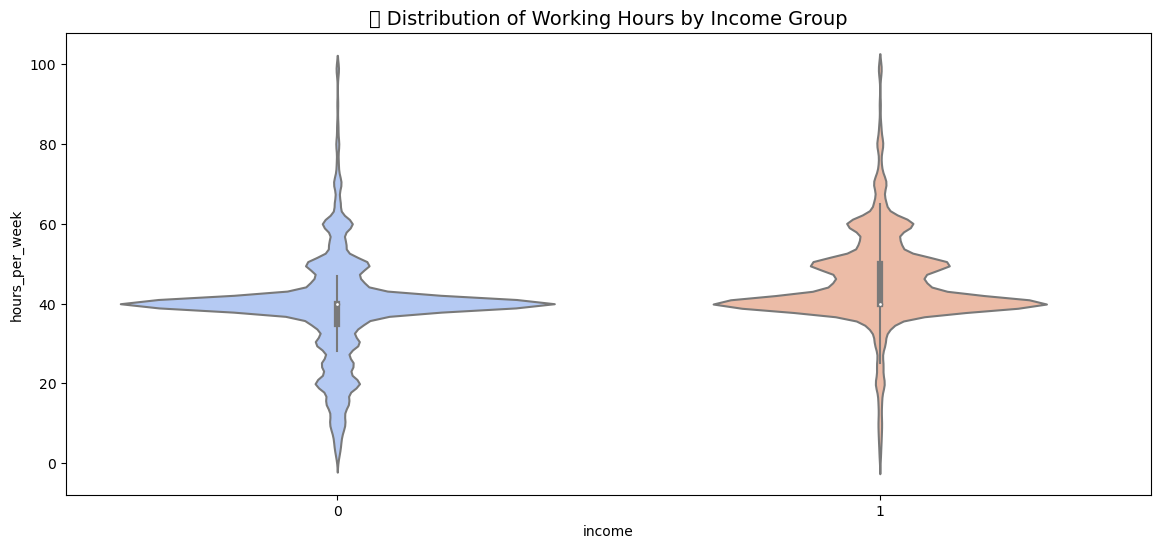

D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


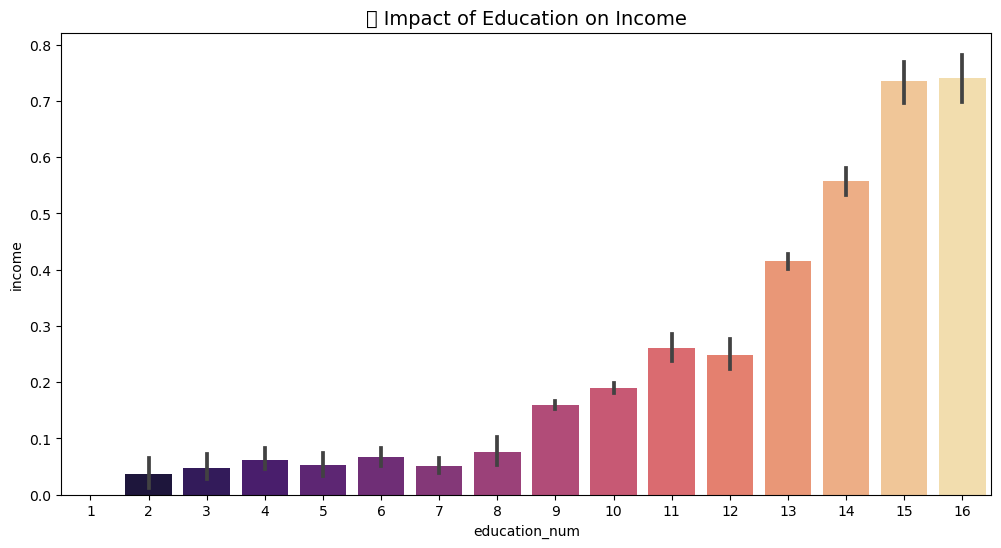

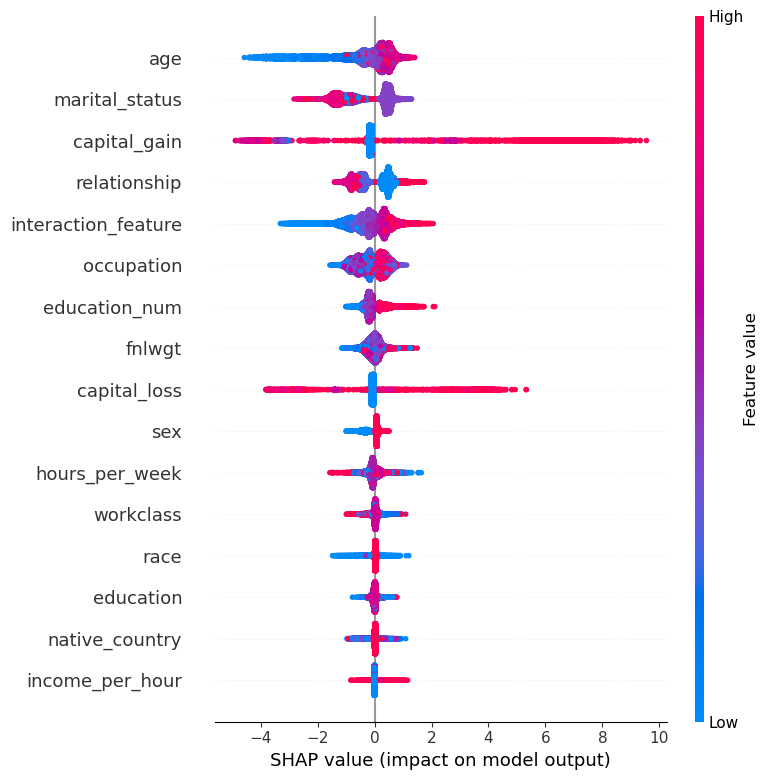

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import xgboost

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import mutual_info_classif, SelectKBest, f_classif

# 📌 Load Dataset
file_path = r"C:\Users\Owner\OneDrive\Desktop\SVM\Recomandation system\adult_with_headers.csv"
df = pd.read_csv(file_path)

# 📌 Quick Overview
print("🔹 First 5 Rows:\n", df.head(), "\n")
print("🔹 Dataset Info:\n", df.info(), "\n")
print("🔹 Summary Statistics:\n", df.describe(), "\n")

# 📌 Handle Missing Values
df.dropna(inplace=True)  # Drop rows with missing values

# 📌 Convert Categorical Variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for inverse transformation if needed

# 📌 Feature Engineering (New Features)
df["income_per_hour"] = df["capital_gain"] / (df["hours_per_week"] + 1)  # Avoid division by zero
df["interaction_feature"] = df["education_num"] * df["hours_per_week"]

# 📌 Normalize Data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# 📌 Pearson Correlation Matrix (Feature Relationships)
plt.figure(figsize=(12, 6))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("🔹 Feature Correlation Heatmap", fontsize=14)
plt.show()

# 📌 Feature Importance using Mutual Information
X = df.drop(columns=["income"])  # Target column: "income"
y = df["income"]

mi_scores = mutual_info_classif(X, y, random_state=42)
mi_results = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# 📌 Plot Mutual Information Scores
plt.figure(figsize=(14, 6))
sns.barplot(x=mi_results.index, y=mi_results, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("🔹 Feature Importance (Mutual Information)", fontsize=14)
plt.xlabel("Features")
plt.ylabel("MI Score")
plt.show()

# 📌 Feature Selection using SelectKBest
top_k = 10  # Select top 10 features
selector = SelectKBest(score_func=f_classif, k=top_k)
X_selected = selector.fit_transform(X, y)

# 📌 Show Selected Features
selected_features = X.columns[selector.get_support()]
print("\n🔹 Selected Features:", selected_features.tolist())

# 📌 Final DataFrame with Selected Features
df_final = df[selected_features]
print("\n🔹 Final Processed Dataset Sample:\n", df_final.head())

# 📌 Save Processed Data
df_final.to_csv("processed_data.csv", index=False)
print("\n✅ Processed data saved as 'processed_data.csv'") 

# ------------------------------------------------------
# 🔹 Additional Exploratory Data Analysis (EDA) 🔹
# ------------------------------------------------------

# 📌 Data Distribution & Outliers
df.hist(figsize=(14, 10), bins=30, edgecolor="black")
plt.suptitle("🔹 Feature Distributions", fontsize=14)
plt.show()

# 📌 Boxplots for Outlier Detection
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("🔹 Boxplot of Features (Outlier Detection)", fontsize=14)
plt.show()

# 📌 Categorical Feature Analysis
categorical_cols = df.select_dtypes(include=['int', 'object']).columns

plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_cols[:6]):  # Limiting to 6 for readability
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[col], palette="coolwarm")
    plt.title(f"🔹 Countplot of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📌 Correlation with Target Variable
plt.figure(figsize=(10, 5))
df.corr()["income"].drop("income").sort_values().plot(kind="barh", cmap="coolwarm")
plt.title("🔹 Correlation of Features with Target", fontsize=14)
plt.xlabel("Correlation Coefficient")
plt.show()

# 📌 Pairwise Relationships
sns.pairplot(df, vars=["age", "hours_per_week", "education_num", "capital_gain"], hue="income", palette="coolwarm")
plt.show()

# 📌 Violin & Swarm Plots for Target
plt.figure(figsize=(14, 6))
sns.violinplot(x="income", y="hours_per_week", data=df, palette="coolwarm")
plt.title("🔹 Distribution of Working Hours by Income Group", fontsize=14)
plt.show()

# 📌 Relationship Between Education & Income
plt.figure(figsize=(12, 6))
sns.barplot(x="education_num", y="income", data=df, palette="magma")
plt.title("🔹 Impact of Education on Income", fontsize=14)
plt.show()

# ------------------------------------------------------
# 🔹 Feature Importance using SHAP (Advanced Analysis) 🔹
# ------------------------------------------------------

# 📌 Train a simple XGBoost model
model = xgboost.XGBClassifier()
model.fit(X, y)

# 📌 Compute SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X)

# 📌 SHAP Summary Plot
shap.summary_plot(shap_values, X)



